<a href="https://colab.research.google.com/github/KWSantos/Data-Science/blob/main/ML-Algorithms/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
A Regressão Logística, apesar do nome, é um dos algoritmos de aprendizado supervisionado mais fundamentais e amplamente utilizados para classificação, especialmente para problemas com duas classes (binários).
Ela funciona modelando a probabilidade de um determinado resultado ou classe ocorrer.
Diferente da Regressão Linear, que prevê um valor contínuo, a Regressão Logística utiliza uma função matemática chamada função logística ou sigmoide para transformar sua saída em uma probabilidade, que sempre estará entre 0 e 1. A função sigmoide tem o seguinte formato:
S(z)=frac11+e^−z

Onde z é a combinação linear dos atributos de entrada e seus respectivos pesos (coeficientes), calculada de forma semelhante à regressão linear:
z=
beta_0 + beta_1x_1 + beta_2x_2 +...+ beta_nx_n

beta_0 é o intercepto (bias).
beta_1, beta_2,..., beta_n são os coeficientes aprendidos pelo modelo para cada atributo (x_1,x_2,...,x_n).

O processo de treinamento do modelo consiste em encontrar os melhores valores para os coeficientes (beta) que façam com que a saída da função sigmoide se aproxime ao máximo dos resultados reais no conjunto de dados de treinamento.
O resultado da função sigmoide é a probabilidade de a instância pertencer à classe positiva (geralmente representada por 1).

Por exemplo, na análise de risco de crédito, poderíamos definir o resultado como binário: "Mau Pagador" (1) e "Bom Pagador" (0). Vamos analisar um novo cliente com os atributos:
Renda: R$ 3.000
Histórico de crédito: Bom (pode ser codificado como 1, e "ruim" como 0)
Dívida: R$ 10.000
O algoritmo de Regressão Logística, já treinado, faria o seguinte:
Cálculo da Combinação Linear (z): O modelo utiliza os coeficientes que aprendeu durante o treinamento. Suponha que os coeficientes sejam:
beta_0=−1.5, beta_1(renda)=0.0005, beta_2(histórico)=−2.0, beta_3(dívida)=0.0002.
z=−1.5+(0.0005times3000)+(−2.0times1)+(0.0002times10000)
z=−1.5+1.5−2.0+2.0=0

Cálculo da Probabilidade: O valor de z é inserido na função sigmoide:
P(textMauPagador)=frac11+e−0 = frac11+1=0.5
Isso significa que o cliente tem uma probabilidade de 50% de ser um mau pagador.
Classificação Final: Para tomar uma decisão, define-se um limiar de corte (threshold), geralmente 0.5.
Se a probabilidade for > 0.5, o cliente é classificado como "Mau Pagador".
Se a probabilidade for <= 0.5, o cliente é classificado como "Bom Pagador".
Neste caso, o cliente seria classificado como "Bom Pagador".

Uma das grandes vantagens da Regressão Logística é que ela não apenas fornece uma classificação, mas também a probabilidade associada a ela.
Além disso, os coeficientes (beta) do modelo são interpretáveis: eles indicam a influência de cada atributo na probabilidade do resultado.
Por ser um modelo linear, é rápido e eficiente, funcionando bem como um excelente ponto de partida (baseline) para problemas de classificação.

Referências

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
https://aws.amazon.com/pt/what-is/logistic-regression/
https://towardsdatascience.com/a-gentle-introduction-to-complementary-log-log-regression-8ac3c5c1cd83/
"""

In [ ]:
import pickle as pkl
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

#Base Credito

In [ ]:
with open('credit.pkl', 'rb') as f:
    x_credit_train, x_credit_test, y_credit_train, y_credit_test = pkl.load(f)
x_credit_train.shape, y_credit_train.shape, x_credit_test.shape, y_credit_test.shape

((24432, 3), (24432,), (8144, 3), (8144,))

In [ ]:
logistic_regression_credit = LogisticRegression(random_state=1)
logistic_regression_credit.fit(x_credit_train, y_credit_train)

LogisticRegression(random_state=1)

In [ ]:
logistic_regression_credit.intercept_, logistic_regression_credit.coef_

(array([1.55500502]), array([[-0.01333885,  0.06325539, -0.11861514]]))

In [ ]:
predicts_credit = logistic_regression_credit.predict(x_credit_test)

In [ ]:
accuracy_score(y_credit_test, predicts_credit)

0.8194990176817288

In [ ]:
print(classification_report(y_credit_test, predicts_credit))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1470
           1       0.82      1.00      0.90      6674

    accuracy                           0.82      8144
   macro avg       0.41      0.50      0.45      8144
weighted avg       0.67      0.82      0.74      8144



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


0.8194990176817288

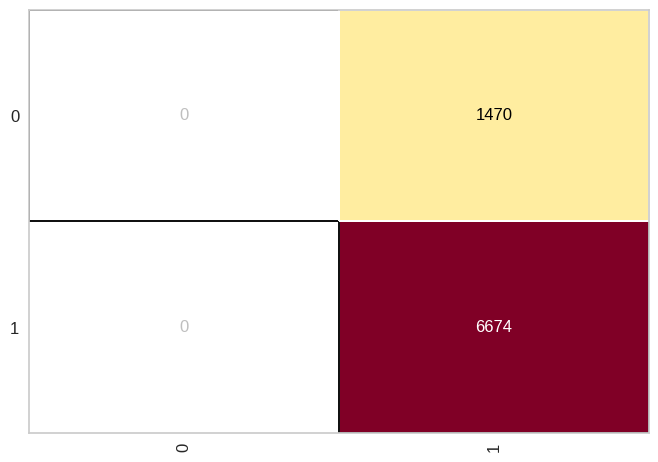

In [ ]:
cm_credit = ConfusionMatrix(logistic_regression_credit)
cm_credit.fit(x_credit_train, y_credit_train)
cm_credit.score(x_credit_test, y_credit_test)

#Base Censo

In [ ]:
with open('census.pkl', 'rb') as f:
    x_census_train, y_census_train, x_census_test, y_census_test = pkl.load(f)
x_census_train.shape, y_census_train.shape, x_census_test.shape, y_census_test.shape

((27676, 108), (27676,), (4884, 108), (4884,))

In [ ]:
logistic_regression_census = LogisticRegression(random_state=1)
logistic_regression_census.fit(x_census_train, y_census_train)

LogisticRegression(random_state=1)

In [ ]:
predicts_census = logistic_regression_census.predict(x_census_test)

In [ ]:
accuracy_score(y_census_test, predicts_census)

0.8568796068796068

In [ ]:
print(classification_report(y_census_test, predicts_census))

              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      3759
        >50K       0.73      0.60      0.66      1125

    accuracy                           0.86      4884
   macro avg       0.81      0.77      0.78      4884
weighted avg       0.85      0.86      0.85      4884



0.8568796068796068

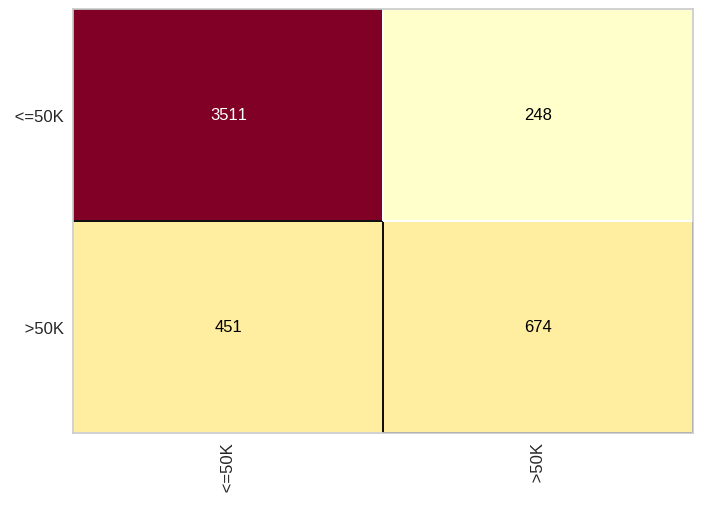

In [ ]:
cm_census = ConfusionMatrix(logistic_regression_census)
cm_census.fit(x_census_train, y_census_train)
cm_census.score(x_census_test, y_census_test)